In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


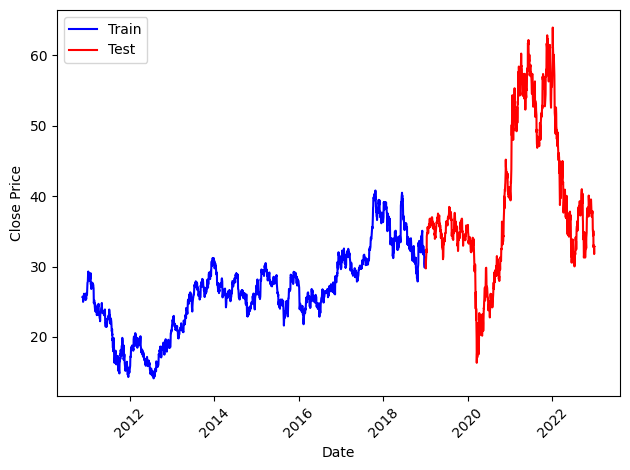

In [2]:
#GM
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

In [24]:
data.data_period = "train"
print("Train period:")
data.comparison_metrics()
data.buy_and_hold()
print("\n")
data.data_period = "test"
print("Test period:")
data.comparison_metrics()
data.buy_and_hold()

Train period:
Return: 0.25482478294066824
Portfolio MDD: 0.4296598294757559
Portfolio Std Dev: 0.07668105104126983
Buy and Hold Strategy Profit: -0.02.
Buy and Hold Strategy MDD   : 0.42.


Test period:
Return: 0.08102175188235927
Portfolio MDD: 0.7504753700331097
Portfolio Std Dev: 0.1419576206685815
Buy and Hold Strategy Profit: -0.14.
Buy and Hold Strategy MDD   : 0.47.


Running ring
Generation 1: Best fitness = 5.747764531543127  Average Fitness = 1.5475119198926723
Generation 2: Best fitness = 5.776983562273212  Average Fitness = 2.2797959544590913
Generation 3: Best fitness = 6.150227395565151  Average Fitness = 2.9155644014904487
Generation 4: Best fitness = 6.150227395565151  Average Fitness = 3.354068807765961
Generation 5: Best fitness = 7.283758740627065  Average Fitness = 3.7503404765009583
Generation 6: Best fitness = 7.509019050004114  Average Fitness = 3.9826489223386417
Generation 7: Best fitness = 7.509019050004114  Average Fitness = 4.264982688888021
Generation 8: Best fitness = 7.773853445377543  Average Fitness = 4.633484151207515
Generation 9: Best fitness = 7.773853445377543  Average Fitness = 4.913131632475299
Generation 10: Best fitness = 7.773853445377543  Average Fitness = 5.107630494985274
Island 0 Migration -Left island 9 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right 

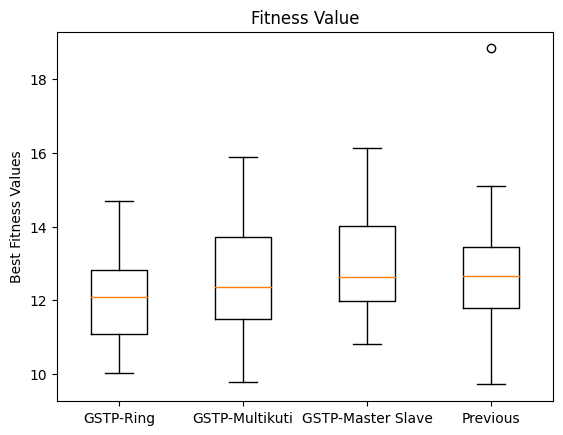

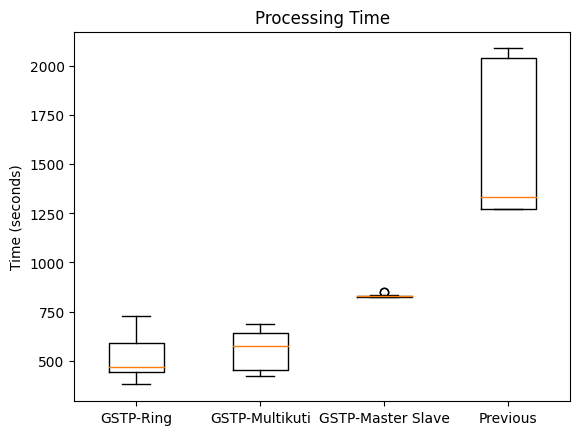

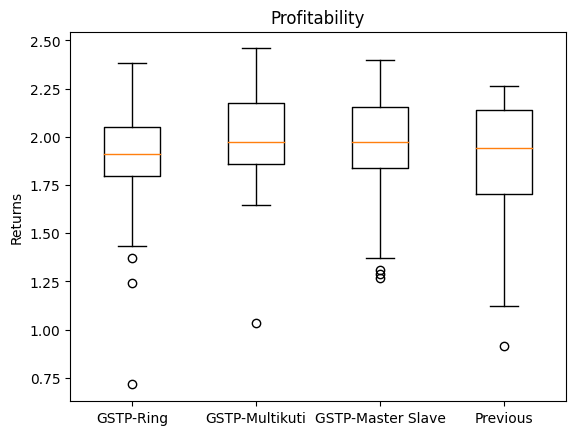

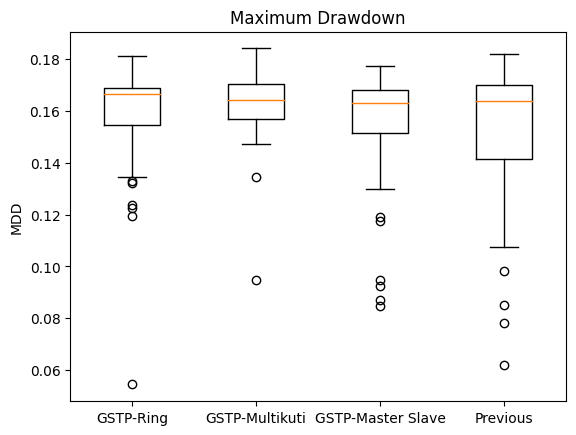

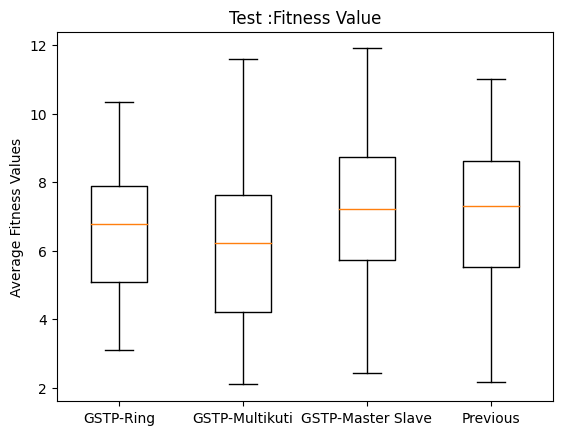

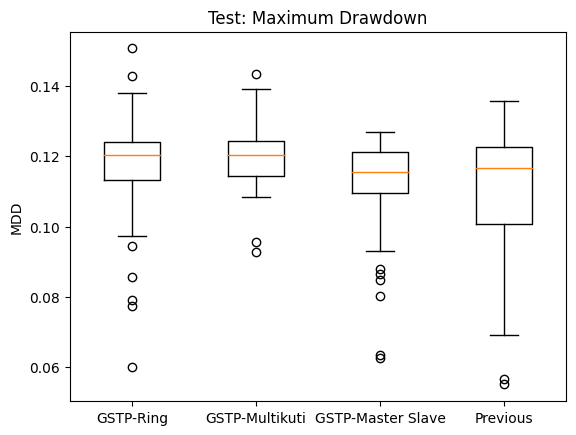

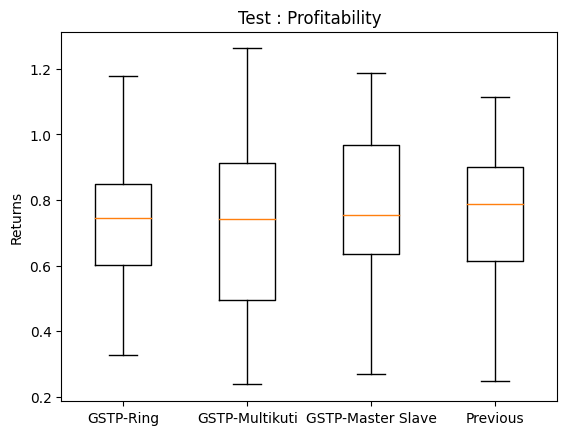

In [4]:
#total return training 
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
speed_values =  {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    for j in range(40):
        start = time.time()
        ga = IslandGGA(data=data.train_data,K=4,num_islands=10,m_iter=10,num_iter=50,pSize=150,r_cross=0.4,r_mut=0.1,strategies=data.top_strategy_names,evolve_strategy=i)
        ga.evolve()
        end = time.time()
        processing_time=end - start
        speed_values[i].append(processing_time)
        ### USE TRAIN DATA? 
        fitness_values[i].append(ga.globalBest.fitness_value)
        profit[i].append(ga.globalBest.profit)
        mdd[i].append(ga.globalBest.mdd)
        ### USE TEST DATA HERE? 
        ga.globalBest.calculate_chromosome_fitness(data.test_data,1)
        test_fitness_values[i].append(ga.globalBest.fitness_value)
        test_profit[i].append(ga.globalBest.profit)
        test_mdd[i].append(ga.globalBest.mdd)



# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Best Fitness Values')

# Set the title of the plot
ax.set_title('Fitness Value')

# Show the plot
plt.show()



#### TIME PLOT
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()



#### profit
# Combine the profit data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a profit box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()


#### mdd
# Combine the risk data into a list
mdd_data = [mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('MDD')

# Set the title of the plot
ax.set_title('Maximum Drawdown')

# Show the plot
plt.show()


# Combine the test fitness data into a list
test_fitness_data = [test_fitness_values[i] for i in  evolve_strategy]
# Create a test fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Test :Fitness Value')
# Show the plot
plt.show()


#### test mdd
# Combine the risk data into a list
test_mdd_data = [test_mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('MDD')

# Set the title of the plot
ax.set_title('Test: Maximum Drawdown')

#### profit
# Combine the profit data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a test profit box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test : Profitability')

# Show the plot
plt.show()

In [23]:
df = pd.DataFrame(test_mdd_data).T
df.columns = evolve_strategy
df.describe().round(3)

,ring,multikuti,master_slave,gga
count,40.000,40.000,40.000,40.000
mean,0.116,0.120,0.111,0.108
std,0.017,0.010,0.016,0.021
min,0.060,0.093,0.063,0.055
25%,0.113,0.114,0.109,0.101
50%,0.120,0.120,0.116,0.117
75%,0.124,0.124,0.121,0.123
max,0.151,0.143,0.127,0.136


In [7]:
print(ga.globalBest)

SLTP: [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
GROUP: [['TS12'], ['TS4', 'TS5', 'TS8'], ['TS11', 'TS3', 'TS6', 'TS7', 'TS10'], ['TS9', 'TS1', 'TS2']]
WEIGHT: [0.47, 0.03, 0.35, 0.14]
FITNESS: 6.3088292403916535


In [30]:
from scipy import stats

# Compare the  metrics of  two algorithms
t_statistic, p_value = stats.ttest_ind(test_profit_data[0], test_profit_data[3])

# Print the results
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference  is not statistically significant.")
print(p_value)


The difference is statistically significant.
0.003854171976274578
